# Assignment 12
**Perform a bivariate analysis on at least 3 combinations of a numerical column with a categorical column in the dataset that you chose in portfolio assignment 4(Pokemon.csv):**
- Use .groupby('columnname').mean() to calculate the means.
- Is there a difference between categories? Then use seaborn barplots to check if there is a statistically significant difference.
---

##### Assumptions:
Ik verwacht dat er weinig verschil zit bij de generaties omdat pokemon de games in balans wil houden en dus niet heftige veranderingen willen doen per generatie. Bij type 1 en 2 weet ik niet zo goed wat ik moet verwachten, wel dat bijvoorbeeld dragon-type pokemon waarschijnlijk hogere total stats hebben.

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pokemon = pd.read_csv('Pokemon.csv', sep=',')
pokemon = pokemon.dropna()
pokemon = pokemon.drop(columns=['#', 'Legendary'])
pokemonType = pokemon.drop(columns=['Generation'])

In [38]:
generation_means = pokemon.groupby('Generation').mean(numeric_only=True).round(2)
print(generation_means)

             Total     HP  Attack  Defense  Sp. Atk  Sp. Def  Speed
Generation                                                         
1           447.36  68.31   81.21    77.14    78.45    70.76  71.50
2           436.62  70.40   75.04    80.78    66.35    79.35  64.71
3           453.99  66.82   86.05    77.77    80.32    74.17  68.87
4           478.75  73.67   85.13    83.04    81.67    82.01  73.21
5           462.15  75.65   86.05    78.02    76.38    73.43  72.62
6           458.74  68.62   83.14    83.74    76.18    76.06  71.00


In [39]:
type_means = pokemonType.groupby('Type 1').mean(numeric_only=True).round(2)
print(type_means)

           Total     HP  Attack  Defense  Sp. Atk  Sp. Def  Speed
Type 1                                                           
Bug       408.10  58.13   77.71    75.73    58.63    71.71  66.17
Dark      450.29  69.81   88.19    74.52    71.48    73.24  73.05
Dragon    622.38  94.57  122.57    96.48   116.24    97.86  94.67
Electric  490.82  59.47   68.88    83.76   108.88    85.35  84.47
Fairy     475.00  70.00   45.00    90.00   100.00   110.00  60.00
Fighting  477.86  66.14   95.86    75.14    82.57    69.86  88.29
Fire      511.58  78.29   92.17    78.71   105.46    80.17  76.79
Flying    390.00  62.50   50.00    57.50    71.00    60.00  89.00
Ghost     444.09  71.32   72.55    78.09    82.05    70.59  69.50
Grass     436.81  69.84   77.14    71.14    81.24    75.35  62.11
Ground    466.42  80.00  101.32    86.26    62.42    67.58  68.84
Ice       419.09  76.82   69.09    61.36    75.00    69.09  67.73
Normal    390.68  70.97   72.97    57.54    56.43    57.76  75.00
Poison    

In [40]:
type_means = pokemonType.groupby('Type 2').mean(numeric_only=True).round(2)
print(type_means)

           Total     HP  Attack  Defense  Sp. Atk  Sp. Def  Speed
Type 2                                                           
Bug       393.33  53.33   90.00    80.00    46.67    61.67  61.67
Dark      484.40  75.55  109.80    72.05    81.80    69.85  75.35
Dragon    526.17  82.17   94.44    87.06    98.50    83.44  80.56
Electric  455.33  88.17   72.67    68.33    81.17    73.50  71.50
Fairy     417.96  64.30   61.61    73.87    75.00    81.96  61.22
Fighting  525.85  79.46  112.85    82.50    81.27    82.38  87.38
Fire      506.25  71.25   81.25    80.17   110.42    83.50  79.67
Flying    452.55  71.39   80.29    68.31    75.63    71.21  85.72
Ghost     430.71  59.14   84.14    82.29    73.21    78.07  53.86
Grass     408.92  62.64   74.16    80.12    60.16    74.52  57.32
Ground    444.34  77.23   89.86    90.31    65.54    66.74  54.66
Ice       525.71  90.00   98.00    85.64    92.64    84.79  74.64
Normal    411.50  63.50   52.75    53.75    88.00    64.25  89.25
Poison    

#### Findings:
Er is nauwelijks verschil in de data tussen de generaties, generatie 2 ziet wat lagere stat points/total statpoints vergeleken met de rest en schiet generatie 4 er uit als het hoogste totaal.

---

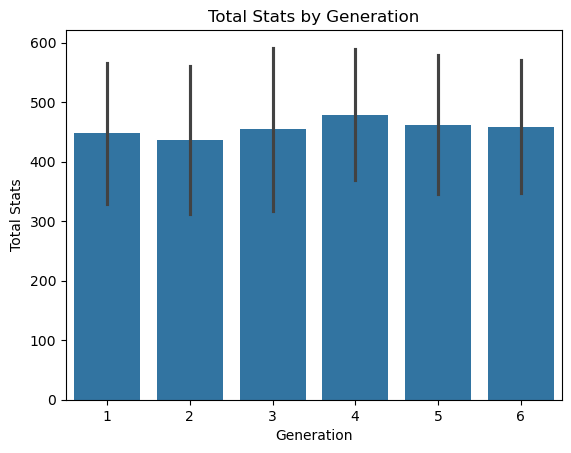

In [48]:
sns.barplot(data=pokemon, x='Generation', y='Total', errorbar='sd')
plt.title('Total Stats by Generation')
plt.ylabel('Total Stats')
plt.show()

##### Conclusion:
eigenlijk hetzelfde als de findings hiervoor, 2 is het laagst qua total stats en 4 het hoogst. de rest is vrij gelijk en ook de laagste en hoogste zijn niet enorm verschillend met de rest. de confidence intervals zijn vrij groot.

---


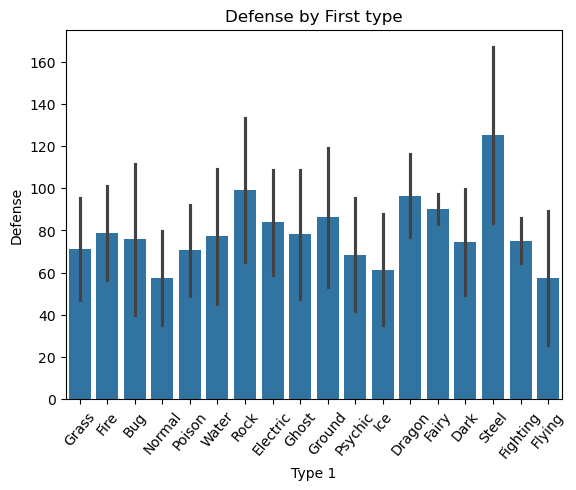

In [44]:
sns.barplot(data=pokemon, x='Type 1', y='Defense', errorbar='sd')
plt.title('Defense by First type')
plt.ylabel('Defense')
plt.xticks(rotation=50)
plt.show()

##### Conclusion:
Je ziet hierbij veel verschillende dingen, je kan zien dat steel, rock, dragon en ground echt uitschieters zijn als het gaat om defence, vooral steel heeft veel defence. flying, ice en normal types hebben veel lagere gemiddelde defence dan de rest. Ook hier hele hoge confidence intervals.

---


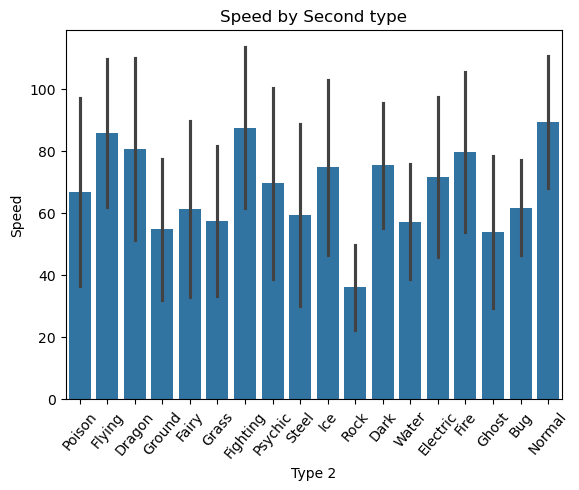

In [46]:
sns.barplot(data=pokemon, x='Type 2', y='Speed', errorbar='sd')
plt.title('Speed by Second type')
plt.ylabel('Speed')
plt.xticks(rotation=50)
plt.show()

##### Conclusion:
Veel hoge getallen bij second type speed stats, rock daar in tegen heeft een extreem lage speed vergeleken met de rest, de hoogste speed voor second type zijn: normal, fighting en flying. Ook hier een hoge confidence interval, wel belangrijk om te vermelden dat het gaat om type 2, dus alles wat maar 1 type heeft (bijv alleen rock, niet rock/fighting) valt niet onder de data hier.

---


### Findings:

Er is zeker een verschil tussen categorys. Bij generation pak je echt alle pokemons waardoor je het beste beeld hebt op het gemiddelde van de totale stats. Type 1 pakt ook alle pokemon en laat zien watvoor pokemons dus heel veel defence hebben in dit geval. Type 2 pakt niet alle pokemon en heeft daarom minder data om mee te werken, de resultaten zijn op een zelfde manier weergegeven als bij type 1 alleen dan gaat het om speed.